In [2]:
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from statsmodels.nonparametric.smoothers_lowess import lowess

n_time = 100
x = np.linspace(0.1, 10, n_time)

q = 3
r = 2

phi1 = 0.75
phi2 = -0.05
F = np.random.normal(0, 0.1, [n_time, r])
for t in range(1, n_time):
    F[t, 0] = phi1 * F[t - 1, 0] + F[t, 0]
    F[t, 1] = phi2 * F[t - 1, 1] + F[t, 1]
F[:, 0] = lowess(F[:, 0], x, is_sorted = True, frac = 0.075, it = 1)[:, 1]
F[:, 1] = lowess(F[:, 1], x, is_sorted = True, frac = 0.075, it = 1)[:, 1]
loading = np.random.normal(0, 0.5, [r, q])
sigma2_eps = [0.000001 for i in range(1, q + 1)]
eps = np.random.multivariate_normal(np.repeat(0, q), np.diag(sigma2_eps), n_time)
Y = np.matmul(F, loading) + eps
f1 = F[:, 0]
f2 = F[:, 1]

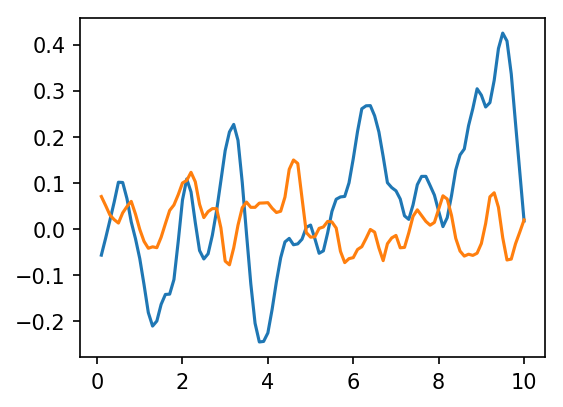

In [15]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(x, f1)
plt.plot(x, f2)
plt.show()

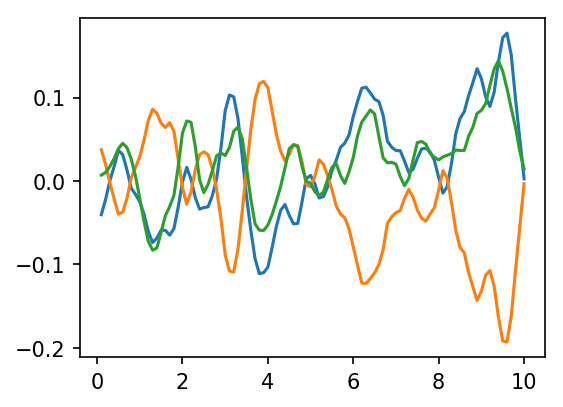

In [16]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(q):
    plt.plot(x, Y[:, j])
plt.show()

In [17]:
from sklearn.decomposition import PCA

In [18]:
latent_dim = r
pca = PCA(n_components=latent_dim)
components = pca.fit_transform(Y)

In [19]:
Y_hat = pca.inverse_transform(components)
mse = np.mean((Y - Y_hat) ** 2)
print(mse)

3.206839036897397e-07


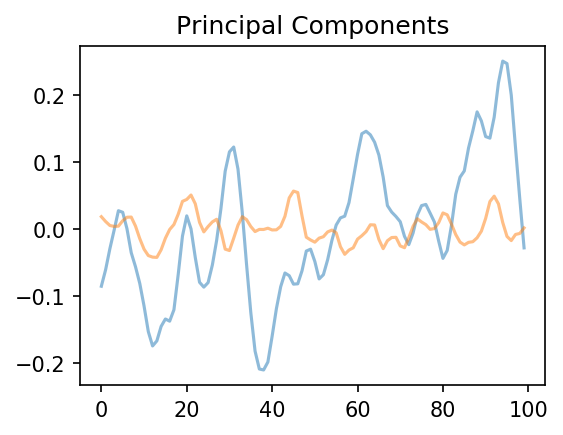

In [20]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(2):
    plt.plot(components[:, j], alpha=0.5)
plt.title('Principal Components')
plt.show()

In [21]:
from model import *

In [22]:
loading_matrix = np.random.normal(0, 1, [2, q])
Y_variance = np.random.normal(0, 0.2, q) ** 2
X = np.linspace(0.1, 10, n_time).reshape((n_time, 1))  # create initial GP covariance matrices
cov1 = sample_covariance(X, 1.0, 1.0)  # length scale 1.0 corresponds to 10 time points
cov2 = sample_covariance(X, 1.0, 1.0)  # variance scale set to 1.0 as well
S1, S2, S3, S4 = build_covariance_blocks([cov1, cov2], loading_matrix, Y_variance)
F = sample_conditional_F(Y, S1, S2, S3, S4)

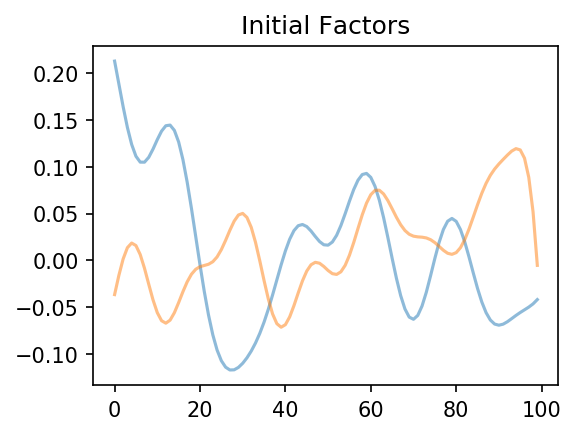

In [23]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(2):
    plt.plot(F[:, j], alpha=0.5)
plt.title('Initial Factors')
plt.show()

In [24]:
def run_model_sampler(Y, initial_F, n_iter):
    """
    Create model and run Gibbs sampler for n iterations.
    """
    F_sample = []
    loading_sample = []
    variance_sample = []
    trace_sample = []
    mse_history = []
    F = initial_F
    for i in tqdm(range(n_iter)):
        F, loading_matrix, Y_variance, gp_traces, mse = gibbs_sampling(F, Y, gprior_params=(10, 0.01))
        F_sample.append(F)
        loading_sample.append(loading_matrix)
        variance_sample.append(Y_variance)
        trace_sample.append(gp_traces)
        mse_history.append(mse)
    return F_sample, loading_sample, variance_sample, trace_sample, mse_history

In [25]:
results = run_model_sampler(Y, F, 200)

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

0.0027897997011061423


C:\Users\sp\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\sp\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\sp\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `

0.0019155420361808985


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 486.92it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  1%|▊                                                                                 | 2/200 [00:13<26:09,  7.93s/it]

0.0032261098194225563


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 495.53it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  2%|█▏                                                                                | 3/200 [00:18<22:28,  6.85s/it]

0.0023030239533725003


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 470.18it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  2%|█▋                                                                                | 4/200 [00:22<20:01,  6.13s/it]

0.002370127585318002


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 490.89it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  2%|██                                                                                | 5/200 [00:27<18:14,  5.61s/it]

0.002578556712679349


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 478.97it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  3%|██▍                                                                               | 6/200 [00:31<17:03,  5.27s/it]

0.002343872203383103


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 486.93it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  4%|██▊                                                                               | 7/200 [00:35<16:09,  5.03s/it]

0.0027707073676472875


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 484.18it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  4%|███▎                                                                              | 8/200 [00:40<15:34,  4.87s/it]

0.002389007416478183


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 490.70it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  4%|███▋                                                                              | 9/200 [00:44<15:01,  4.72s/it]

0.0024184261644745733


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 491.09it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  5%|████                                                                             | 10/200 [00:49<14:38,  4.63s/it]

0.002390560830274263


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 469.45it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  6%|████▍                                                                            | 11/200 [00:53<14:26,  4.58s/it]

0.0024853820686394886


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 476.69it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  6%|████▊                                                                            | 12/200 [00:58<14:23,  4.60s/it]

0.0019474078101458724


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 470.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  6%|█████▎                                                                           | 13/200 [01:02<14:13,  4.56s/it]

0.0028653077036296915


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 461.52it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  7%|█████▋                                                                           | 14/200 [01:07<14:01,  4.53s/it]

0.0027812562196388954


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 474.25it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  8%|██████                                                                           | 15/200 [01:11<13:53,  4.51s/it]

0.002643841010695462


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 471.65it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  8%|██████▍                                                                          | 16/200 [01:16<13:53,  4.53s/it]

0.002712377924745421


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 465.61it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  8%|██████▉                                                                          | 17/200 [01:20<13:47,  4.52s/it]

0.002365643224285236


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 434.33it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  9%|███████▎                                                                         | 18/200 [01:25<13:45,  4.54s/it]

0.002711748133184026


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 467.23it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 10%|███████▋                                                                         | 19/200 [01:29<13:40,  4.53s/it]

0.0022388685548310585


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 463.30it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 10%|████████                                                                         | 20/200 [01:34<13:45,  4.59s/it]

0.003766624684436271


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 468.17it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 10%|████████▌                                                                        | 21/200 [01:39<13:38,  4.57s/it]

0.0024517051489767803


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 460.99it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 11%|████████▉                                                                        | 22/200 [01:43<13:34,  4.58s/it]

0.0027698959748299317


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 447.95it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 12%|█████████▎                                                                       | 23/200 [01:48<13:38,  4.62s/it]

0.0033165844908883382


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 459.23it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 12%|█████████▋                                                                       | 24/200 [01:53<13:34,  4.63s/it]

0.002522638307677719


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 454.87it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 12%|██████████▏                                                                      | 25/200 [01:57<13:35,  4.66s/it]

0.0029095289776626433


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 460.46it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 13%|██████████▌                                                                      | 26/200 [02:02<13:21,  4.60s/it]

0.0030626001533546705


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 456.26it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 14%|██████████▉                                                                      | 27/200 [02:07<13:23,  4.65s/it]

0.0023591318219842814


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 440.39it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 14%|███████████▎                                                                     | 28/200 [02:11<13:25,  4.68s/it]

0.002403628270539547


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 455.06it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 14%|███████████▋                                                                     | 29/200 [02:16<13:27,  4.72s/it]

0.0028434340735014924


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 451.13it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 427.40it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 15%|████████████▏                                                                    | 30/200 [02:21<13:30,  4.77s/it]

0.0027322983230384686


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 443.32it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 16%|████████████▌                                                                    | 31/200 [02:26<13:34,  4.82s/it]

0.002746031532439975


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 443.80it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 16%|████████████▉                                                                    | 32/200 [02:31<13:29,  4.82s/it]

0.0025189090229945634


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 439.75it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 16%|█████████████▎                                                                   | 33/200 [02:36<13:32,  4.86s/it]

0.002591678166639625


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 441.53it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 17%|█████████████▊                                                                   | 34/200 [02:41<13:29,  4.88s/it]

0.002666442526790782


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 434.21it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 18%|██████████████▏                                                                  | 35/200 [02:46<13:25,  4.88s/it]

0.0026076145274488084


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 428.64it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 18%|██████████████▌                                                                  | 36/200 [02:50<13:13,  4.84s/it]

0.0025622699755563534


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 430.65it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 18%|██████████████▉                                                                  | 37/200 [02:56<13:36,  5.01s/it]

0.0025027686839401843


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 327.39it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 19%|███████████████▍                                                                 | 38/200 [03:01<14:02,  5.20s/it]

0.002659999756791631


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 409.81it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 380.28it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\sp\Dropbox\Research\LFGP\LFGP-master\gibbs.py:135: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  F_stack = np.random.multivariate_normal(mu, covariance)
 20%|███████████████▊                                                                 | 39/200 [03:06<13:43,  5.11s/it]

0.0030378941959339667


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 404.98it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 20%|████████████████▏                                                                | 40/200 [03:11<13:40,  5.13s/it]

0.002294417833726997


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 404.83it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 20%|████████████████▌                                                                | 41/200 [03:17<13:38,  5.15s/it]

0.0024087453303487626


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 378.95it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 21%|█████████████████                                                                | 42/200 [03:22<13:29,  5.12s/it]

0.0023946930285629036


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 391.28it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 22%|█████████████████▍                                                               | 43/200 [03:27<13:28,  5.15s/it]

0.0024510442594785063


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 390.39it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 22%|█████████████████▊                                                               | 44/200 [03:32<13:25,  5.16s/it]

0.002877187996427478


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 386.38it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 22%|██████████████████▏                                                              | 45/200 [03:37<13:11,  5.11s/it]

0.002408873593815737


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 386.88it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 23%|██████████████████▋                                                              | 46/200 [03:42<13:13,  5.15s/it]

0.002580674119417381


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 378.00it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 24%|███████████████████                                                              | 47/200 [03:48<13:18,  5.22s/it]

0.0024753014404358628


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 379.43it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 24%|███████████████████▍                                                             | 48/200 [03:53<13:07,  5.18s/it]

0.0025673713742961467


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 388.50it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 24%|███████████████████▊                                                             | 49/200 [03:58<13:09,  5.23s/it]

0.0031684902122566866


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 439.76it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 25%|████████████████████▎                                                            | 50/200 [04:03<12:44,  5.09s/it]

0.002648164163200577


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 437.83it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 26%|████████████████████▋                                                            | 51/200 [04:08<12:42,  5.12s/it]

0.0035456271174315393


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 441.86it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 26%|█████████████████████                                                            | 52/200 [04:13<12:39,  5.13s/it]

0.002177166832271749


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 440.23it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 26%|█████████████████████▍                                                           | 53/200 [04:18<12:23,  5.06s/it]

0.003066735700273948


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 446.45it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 380.07it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 27%|█████████████████████▊                                                           | 54/200 [04:24<12:36,  5.18s/it]

0.002261842241171727


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 411.20it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 28%|██████████████████████▎                                                          | 55/200 [04:29<12:25,  5.14s/it]

0.0024831886045029866


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 414.03it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 28%|██████████████████████▋                                                          | 56/200 [04:34<12:33,  5.23s/it]

0.002221728206189484


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 408.97it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 28%|███████████████████████                                                          | 57/200 [04:39<12:19,  5.17s/it]

0.001910544589220623


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 420.55it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 29%|███████████████████████▍                                                         | 58/200 [04:44<12:20,  5.21s/it]

0.0019510681105540787


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 446.93it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 30%|███████████████████████▉                                                         | 59/200 [04:49<11:55,  5.07s/it]

0.0020626836721419008


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 438.32it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 30%|████████████████████████▎                                                        | 60/200 [04:54<11:52,  5.09s/it]

0.0019372911839785052


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 447.93it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 30%|████████████████████████▋                                                        | 61/200 [04:59<11:32,  4.98s/it]

0.002746960735667334


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 436.41it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 31%|█████████████████████████                                                        | 62/200 [05:04<11:36,  5.05s/it]

0.0017875975440020057


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 430.32it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 32%|█████████████████████████▌                                                       | 63/200 [05:09<11:26,  5.01s/it]

0.0021597818016608227


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 408.00it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 32%|█████████████████████████▉                                                       | 64/200 [05:15<11:39,  5.14s/it]

0.0023563763066847196


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 400.26it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 32%|██████████████████████████▎                                                      | 65/200 [05:20<11:50,  5.26s/it]

0.0026570262152288966


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 344.36it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 33%|██████████████████████████▋                                                      | 66/200 [05:28<13:33,  6.07s/it]

0.0022271254291840103


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 418.21it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 34%|███████████████████████████▏                                                     | 67/200 [05:33<12:47,  5.77s/it]

0.0018625978988638825


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 424.40it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 34%|███████████████████████████▌                                                     | 68/200 [05:39<12:33,  5.71s/it]

0.0033228023351217833


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 404.02it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 34%|███████████████████████████▉                                                     | 69/200 [05:44<11:59,  5.49s/it]

0.0036708844491116182


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 429.40it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 35%|████████████████████████████▎                                                    | 70/200 [05:49<11:50,  5.47s/it]

0.002948487157733477


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.98it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 36%|████████████████████████████▊                                                    | 71/200 [05:55<11:44,  5.46s/it]

0.002283025878355754


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 385.51it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 36%|█████████████████████████████▏                                                   | 72/200 [06:00<11:49,  5.54s/it]

0.0035419386300731552


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 413.73it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 36%|█████████████████████████████▌                                                   | 73/200 [06:05<11:26,  5.40s/it]

0.002583097562555028


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 429.86it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 37%|█████████████████████████████▉                                                   | 74/200 [06:10<11:00,  5.24s/it]

0.002648831274375134


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 445.45it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 38%|██████████████████████████████▍                                                  | 75/200 [06:16<10:55,  5.24s/it]

0.002461951703227186


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 436.73it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 38%|██████████████████████████████▊                                                  | 76/200 [06:20<10:35,  5.12s/it]

0.00235931946727949


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 438.32it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 38%|███████████████████████████████▏                                                 | 77/200 [06:26<10:36,  5.17s/it]

0.004041008481316275


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 373.78it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 39%|███████████████████████████████▌                                                 | 78/200 [06:31<10:36,  5.22s/it]

0.00287399494572872


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 396.17it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 40%|███████████████████████████████▉                                                 | 79/200 [06:37<10:42,  5.31s/it]

0.00291413845145157


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 387.33it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 40%|████████████████████████████████▍                                                | 80/200 [06:42<10:34,  5.29s/it]

0.0025272522727499526


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 399.46it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 40%|████████████████████████████████▊                                                | 81/200 [06:47<10:35,  5.34s/it]

0.0027543072639058556


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 397.88it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 41%|█████████████████████████████████▏                                               | 82/200 [06:52<10:18,  5.24s/it]

0.0025514466399218947


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 404.02it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 42%|█████████████████████████████████▌                                               | 83/200 [06:57<10:03,  5.16s/it]

0.003003987116963821


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 405.39it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 42%|██████████████████████████████████                                               | 84/200 [07:03<10:19,  5.34s/it]

0.0024292921886067834


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 311.62it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 42%|██████████████████████████████████▍                                              | 85/200 [07:10<10:55,  5.70s/it]

0.002525451394761775


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 400.92it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 43%|██████████████████████████████████▊                                              | 86/200 [07:15<10:40,  5.62s/it]

0.0024884785416776642


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 377.16it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 44%|███████████████████████████████████▏                                             | 87/200 [07:20<10:21,  5.50s/it]

0.003005766843641434


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 400.26it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 44%|███████████████████████████████████▋                                             | 88/200 [07:25<09:59,  5.36s/it]

0.002356907448302424


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 388.25it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 44%|████████████████████████████████████                                             | 89/200 [07:31<10:03,  5.43s/it]

0.0026515504770470016


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 390.14it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 45%|████████████████████████████████████▍                                            | 90/200 [07:36<09:46,  5.34s/it]

0.00225396546973265


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 390.76it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 46%|████████████████████████████████████▊                                            | 91/200 [07:41<09:46,  5.38s/it]

0.0031121982492878105


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 382.33it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 46%|█████████████████████████████████████▎                                           | 92/200 [07:47<09:32,  5.30s/it]

0.002460766189073617


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 387.24it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 46%|█████████████████████████████████████▋                                           | 93/200 [07:52<09:18,  5.22s/it]

0.002590807298814347


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 397.09it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 47%|██████████████████████████████████████                                           | 94/200 [07:57<09:24,  5.33s/it]

0.0023733855368898954


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 386.37it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 48%|██████████████████████████████████████▍                                          | 95/200 [08:02<09:11,  5.25s/it]

0.0026019006316587577


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 377.05it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 48%|██████████████████████████████████████▉                                          | 96/200 [08:08<09:19,  5.38s/it]

0.002912223584706668


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 379.56it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 48%|███████████████████████████████████████▎                                         | 97/200 [08:13<09:06,  5.31s/it]

0.0022676628343556156


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 365.93it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 49%|███████████████████████████████████████▋                                         | 98/200 [08:18<09:03,  5.33s/it]

0.0024033508726451934


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 356.08it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 50%|████████████████████████████████████████                                         | 99/200 [08:25<09:26,  5.61s/it]

0.002841586559594795


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 370.32it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 50%|████████████████████████████████████████                                        | 100/200 [08:30<09:10,  5.50s/it]

0.0027814794018111533


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 367.75it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 50%|████████████████████████████████████████▍                                       | 101/200 [08:35<08:56,  5.42s/it]

0.003086850738042509


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 377.89it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 51%|████████████████████████████████████████▊                                       | 102/200 [08:41<09:00,  5.51s/it]

0.0029619399693654467


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 374.59it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 52%|█████████████████████████████████████████▏                                      | 103/200 [08:46<08:43,  5.40s/it]

0.0024733386500727446


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 366.48it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 52%|█████████████████████████████████████████▌                                      | 104/200 [08:52<08:47,  5.49s/it]

0.0031263306830099473


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 367.39it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 376.71it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 52%|██████████████████████████████████████████                                      | 105/200 [08:57<08:33,  5.40s/it]

0.0024346451463755714


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 373.42it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 53%|██████████████████████████████████████████▍                                     | 106/200 [09:02<08:21,  5.33s/it]

0.0031351835328592885


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 375.99it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 54%|██████████████████████████████████████████▊                                     | 107/200 [09:08<08:27,  5.45s/it]

0.002373412717271115


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 372.27it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 54%|███████████████████████████████████████████▏                                    | 108/200 [09:13<08:14,  5.38s/it]

0.002629755485686489


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 375.52it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 55%|███████████████████████████████████████████▌                                    | 109/200 [09:18<08:02,  5.30s/it]

0.0026443076253815025


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 370.89it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 55%|████████████████████████████████████████████                                    | 110/200 [09:24<08:10,  5.45s/it]

0.002541285903949948


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 355.75it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 56%|████████████████████████████████████████████▍                                   | 111/200 [09:29<08:03,  5.44s/it]

0.0023338880057036365


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 360.88it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 56%|████████████████████████████████████████████▊                                   | 112/200 [09:35<07:52,  5.37s/it]

0.0024617105110745006


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 372.05it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 370.84it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 56%|█████████████████████████████████████████████▏                                  | 113/200 [09:40<07:58,  5.51s/it]

0.0023589799932670244


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 371.24it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 57%|█████████████████████████████████████████████▌                                  | 114/200 [09:46<07:45,  5.42s/it]

0.0024818887031248845


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 373.31it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 57%|██████████████████████████████████████████████                                  | 115/200 [09:51<07:32,  5.33s/it]

0.002733461845013609


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 374.82it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 58%|██████████████████████████████████████████████▍                                 | 116/200 [09:57<07:40,  5.48s/it]

0.0025097171838460355


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 371.58it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 58%|██████████████████████████████████████████████▊                                 | 117/200 [10:02<07:27,  5.39s/it]

0.0025693942521593984


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 356.71it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 59%|███████████████████████████████████████████████▏                                | 118/200 [10:08<07:34,  5.54s/it]

0.002849310773484383


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 371.35it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 60%|███████████████████████████████████████████████▌                                | 119/200 [10:13<07:21,  5.44s/it]

0.002862809561684041


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 362.73it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 60%|████████████████████████████████████████████████                                | 120/200 [10:18<07:12,  5.40s/it]

0.0027842152063509407


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 371.59it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 60%|████████████████████████████████████████████████▍                               | 121/200 [10:24<07:17,  5.54s/it]

0.0024539882082943694


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 367.83it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 61%|████████████████████████████████████████████████▊                               | 122/200 [10:29<07:08,  5.49s/it]

0.0024308601030894965


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 357.55it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 62%|█████████████████████████████████████████████████▏                              | 123/200 [10:35<06:58,  5.43s/it]

0.0025239486407965706


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 367.71it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 62%|█████████████████████████████████████████████████▌                              | 124/200 [10:40<06:49,  5.39s/it]

0.002896112720356593


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 376.98it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 62%|██████████████████████████████████████████████████                              | 125/200 [10:46<06:56,  5.56s/it]

0.0031073059124367545


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 366.94it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 63%|██████████████████████████████████████████████████▍                             | 126/200 [10:51<06:44,  5.46s/it]

0.002311739161790649


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 369.87it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 64%|██████████████████████████████████████████████████▊                             | 127/200 [10:56<06:32,  5.37s/it]

0.0024570153475094282


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 371.01it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 64%|███████████████████████████████████████████████████▏                            | 128/200 [11:02<06:42,  5.60s/it]

0.0028218102973522918


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 359.15it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 64%|███████████████████████████████████████████████████▌                            | 129/200 [11:08<06:31,  5.51s/it]

0.0026144736561363926


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.25it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 65%|████████████████████████████████████████████████████                            | 130/200 [11:13<06:24,  5.49s/it]

0.0025838778544508005


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 364.70it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 66%|████████████████████████████████████████████████████▍                           | 131/200 [11:19<06:31,  5.67s/it]

0.0026220579774419257


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 362.28it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 66%|████████████████████████████████████████████████████▊                           | 132/200 [11:25<06:18,  5.56s/it]

0.0030423210965361347


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 362.18it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 66%|█████████████████████████████████████████████████████▏                          | 133/200 [11:30<06:07,  5.48s/it]

0.0032822742667892118


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 371.58it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 67%|█████████████████████████████████████████████████████▌                          | 134/200 [11:36<06:14,  5.67s/it]

0.0028681086637019856


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 359.48it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 68%|██████████████████████████████████████████████████████                          | 135/200 [11:41<06:01,  5.57s/it]

0.002712591160949986


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 367.60it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 68%|██████████████████████████████████████████████████████▍                         | 136/200 [11:47<05:50,  5.48s/it]

0.002630171937908769


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 362.61it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 68%|██████████████████████████████████████████████████████▊                         | 137/200 [11:53<05:56,  5.66s/it]

0.0025263838015815473


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 362.30it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 69%|███████████████████████████████████████████████████████▏                        | 138/200 [11:58<05:43,  5.54s/it]

0.002929368713657854


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 363.28it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 70%|███████████████████████████████████████████████████████▌                        | 139/200 [12:04<05:49,  5.72s/it]

0.0025576245906247944


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 367.28it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 70%|████████████████████████████████████████████████████████                        | 140/200 [12:10<05:49,  5.82s/it]

0.003031071022431841


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 363.50it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 70%|████████████████████████████████████████████████████████▍                       | 141/200 [12:15<05:33,  5.65s/it]

0.002882405260871827


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 359.37it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 71%|████████████████████████████████████████████████████████▊                       | 142/200 [12:21<05:25,  5.61s/it]

0.0028961002571964217


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 365.26it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 72%|█████████████████████████████████████████████████████████▏                      | 143/200 [12:26<05:13,  5.50s/it]

0.0026537147600550932


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 350.48it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 72%|█████████████████████████████████████████████████████████▌                      | 144/200 [12:32<05:20,  5.73s/it]

0.0026683884283077385


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 360.12it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 72%|██████████████████████████████████████████████████████████                      | 145/200 [12:38<05:09,  5.62s/it]

0.002884201270880587


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 361.53it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 73%|██████████████████████████████████████████████████████████▍                     | 146/200 [12:43<04:58,  5.53s/it]

0.002574971911612328


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 367.94it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 74%|██████████████████████████████████████████████████████████▊                     | 147/200 [12:49<05:01,  5.69s/it]

0.0028061763658428726


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 361.74it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 74%|███████████████████████████████████████████████████████████▏                    | 148/200 [12:55<04:50,  5.60s/it]

0.002504306669669847


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 361.85it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 74%|███████████████████████████████████████████████████████████▌                    | 149/200 [13:00<04:41,  5.51s/it]

0.0028243937101364164


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 360.77it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 75%|████████████████████████████████████████████████████████████                    | 150/200 [13:06<04:45,  5.70s/it]

0.0025689630018726384


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 361.97it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 76%|████████████████████████████████████████████████████████████▍                   | 151/200 [13:11<04:33,  5.59s/it]

0.003041238011122785


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 363.06it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 76%|████████████████████████████████████████████████████████████▊                   | 152/200 [13:17<04:24,  5.51s/it]

0.002574002340043418


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.25it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 76%|█████████████████████████████████████████████████████████████▏                  | 153/200 [13:22<04:17,  5.47s/it]

0.002773220689313842


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 355.97it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 77%|█████████████████████████████████████████████████████████████▌                  | 154/200 [13:28<04:21,  5.69s/it]

0.0025357786180352964


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 357.88it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 78%|██████████████████████████████████████████████████████████████                  | 155/200 [13:34<04:11,  5.60s/it]

0.0027277760644734378


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 357.35it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 78%|██████████████████████████████████████████████████████████████▍                 | 156/200 [13:39<04:02,  5.51s/it]

0.003456332045344456


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 360.99it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 78%|██████████████████████████████████████████████████████████████▊                 | 157/200 [13:44<03:54,  5.45s/it]

0.002684233195009792


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 360.34it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 79%|███████████████████████████████████████████████████████████████▏                | 158/200 [13:51<03:59,  5.70s/it]

0.0029650622271327047


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 359.80it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 80%|███████████████████████████████████████████████████████████████▌                | 159/200 [13:56<03:49,  5.60s/it]

0.002573255804888154


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 361.42it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 80%|████████████████████████████████████████████████████████████████                | 160/200 [14:01<03:40,  5.52s/it]

0.003065856293480783


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.25it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 80%|████████████████████████████████████████████████████████████████▍               | 161/200 [14:07<03:43,  5.74s/it]

0.002838269299412435


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 356.07it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 81%|████████████████████████████████████████████████████████████████▊               | 162/200 [14:13<03:34,  5.65s/it]

0.002880115037883193


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 356.40it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 82%|█████████████████████████████████████████████████████████████████▏              | 163/200 [14:18<03:26,  5.58s/it]

0.0030753763791055372


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 357.77it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 82%|█████████████████████████████████████████████████████████████████▌              | 164/200 [14:24<03:18,  5.51s/it]

0.0026576095936205334


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 362.30it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 82%|██████████████████████████████████████████████████████████████████              | 165/200 [14:30<03:22,  5.78s/it]

0.0027802814208408703


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 341.71it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 83%|██████████████████████████████████████████████████████████████████▍             | 166/200 [14:36<03:13,  5.71s/it]

0.002740461318641132


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 357.55it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 84%|██████████████████████████████████████████████████████████████████▊             | 167/200 [14:41<03:05,  5.61s/it]

0.002667495774541361


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 355.86it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 84%|███████████████████████████████████████████████████████████████████▏            | 168/200 [14:47<03:06,  5.82s/it]

0.0030216186053286602


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 352.01it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 84%|███████████████████████████████████████████████████████████████████▌            | 169/200 [14:53<02:57,  5.71s/it]

0.0025288538153239127


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 352.94it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 85%|████████████████████████████████████████████████████████████████████            | 170/200 [14:58<02:48,  5.62s/it]

0.0031037504823918914


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 357.24it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 86%|████████████████████████████████████████████████████████████████████▍           | 171/200 [15:04<02:40,  5.53s/it]

0.002849277722113692


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 354.92it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 86%|████████████████████████████████████████████████████████████████████▊           | 172/200 [15:10<02:41,  5.77s/it]

0.0035223453418863735


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 352.84it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [15:15<02:33,  5.68s/it]

0.003486899880069881


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.35it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 87%|█████████████████████████████████████████████████████████████████████▌          | 174/200 [15:21<02:26,  5.64s/it]

0.0036892383461362833


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 356.70it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 88%|██████████████████████████████████████████████████████████████████████          | 175/200 [15:26<02:19,  5.57s/it]

0.0037663821766444495


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 360.34it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 88%|██████████████████████████████████████████████████████████████████████▍         | 176/200 [15:33<02:20,  5.85s/it]

0.003879471847951428


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 350.89it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 88%|██████████████████████████████████████████████████████████████████████▊         | 177/200 [15:38<02:12,  5.76s/it]

0.003757281810018724


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 352.63it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 89%|███████████████████████████████████████████████████████████████████████▏        | 178/200 [15:44<02:04,  5.66s/it]

0.004010459286547355


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 346.23it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 90%|███████████████████████████████████████████████████████████████████████▌        | 179/200 [15:49<01:57,  5.59s/it]

0.0037324528987150263


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 361.10it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 90%|████████████████████████████████████████████████████████████████████████        | 180/200 [15:56<01:57,  5.86s/it]

0.003802942831582563


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.77it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 90%|████████████████████████████████████████████████████████████████████████▍       | 181/200 [16:01<01:49,  5.75s/it]

0.0038845613619500445


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 352.60it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 91%|████████████████████████████████████████████████████████████████████████▊       | 182/200 [16:07<01:42,  5.68s/it]

0.004265527656805939


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.05it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 92%|█████████████████████████████████████████████████████████████████████████▏      | 183/200 [16:12<01:35,  5.59s/it]

0.003776915389351158


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 354.71it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 92%|█████████████████████████████████████████████████████████████████████████▌      | 184/200 [16:19<01:33,  5.86s/it]

0.004079706036439046


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 345.83it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 92%|██████████████████████████████████████████████████████████████████████████      | 185/200 [16:24<01:26,  5.76s/it]

0.0038835640140936776


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 350.47it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 93%|██████████████████████████████████████████████████████████████████████████▍     | 186/200 [16:30<01:19,  5.71s/it]

0.003940813853889448


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 339.68it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [16:35<01:14,  5.70s/it]

0.0036829380382398485


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 353.15it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 94%|███████████████████████████████████████████████████████████████████████████▏    | 188/200 [16:42<01:11,  5.97s/it]

0.0038063051911733773


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 345.66it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 94%|███████████████████████████████████████████████████████████████████████████▌    | 189/200 [16:47<01:04,  5.85s/it]

0.00423806452557909


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 331.45it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 95%|████████████████████████████████████████████████████████████████████████████    | 190/200 [16:53<00:57,  5.78s/it]

0.004074628158103863


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 339.12it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 352.03it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 96%|████████████████████████████████████████████████████████████████████████████▍   | 191/200 [16:59<00:51,  5.71s/it]

0.003819099081995679


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 350.98it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 96%|████████████████████████████████████████████████████████████████████████████▊   | 192/200 [17:05<00:47,  5.98s/it]

0.004096118694224589


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 347.94it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 96%|█████████████████████████████████████████████████████████████████████████████▏  | 193/200 [17:11<00:40,  5.85s/it]

0.003961667890985271


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 349.15it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 97%|█████████████████████████████████████████████████████████████████████████████▌  | 194/200 [17:16<00:34,  5.79s/it]

0.004017425768742391


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 343.77it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [17:22<00:28,  5.71s/it]

0.0038961608247389413


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 354.40it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 196/200 [17:29<00:23,  5.98s/it]

0.0039604959434756


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 342.38it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [17:34<00:17,  5.87s/it]

0.0037499676726103917


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 340.36it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 99%|███████████████████████████████████████████████████████████████████████████████▏| 198/200 [17:40<00:11,  5.77s/it]

0.0038446855864176983


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 343.66it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████▌| 199/200 [17:45<00:05,  5.71s/it]

0.003760352026942173


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 349.05it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [17:52<00:00,  6.00s/it]


In [26]:
F_sample, loading_sample, variance_sample, trace_sample, mse_history = results

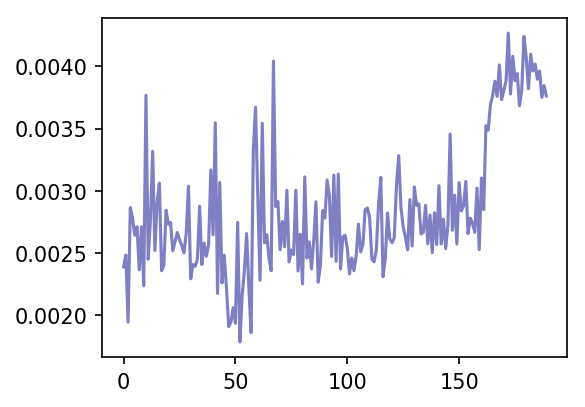

In [27]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(mse_history[10:], alpha=0.5, color='darkblue')
plt.show()

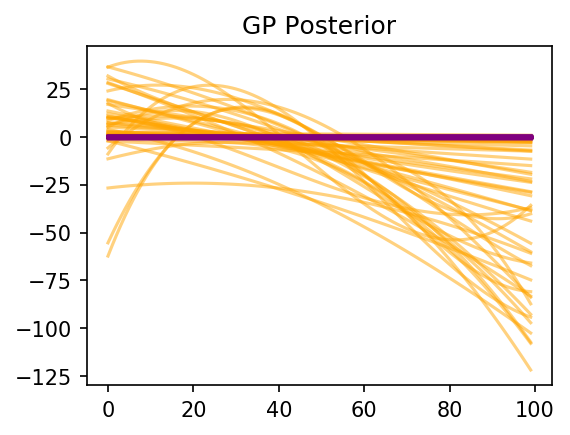

In [30]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(100, 200):
    plt.plot(F_sample[i][:, 0], alpha=0.5, color='orange')
for i in range(100, 200):
    plt.plot(F_sample[i][:, 1], alpha=0.5, color='purple')
#for j in range(2):
#    plt.plot(components[:, j], alpha=0.5, lw=4)
plt.title('GP Posterior')
plt.show()

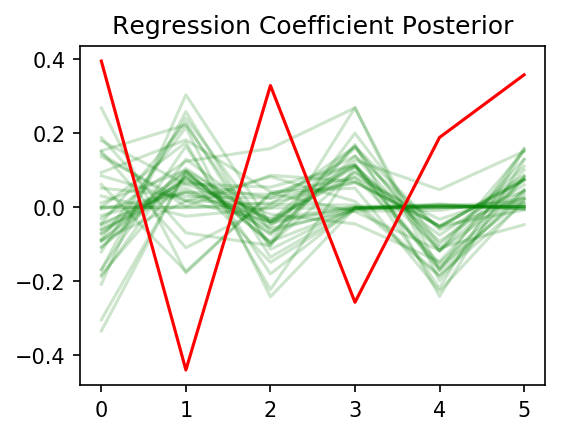

In [31]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(10, 50):
    plt.plot(loading_sample[i].flatten(), alpha=0.2, color='green')
plt.plot(loading.flatten(), color='red')
plt.title('Regression Coefficient Posterior')
plt.show()

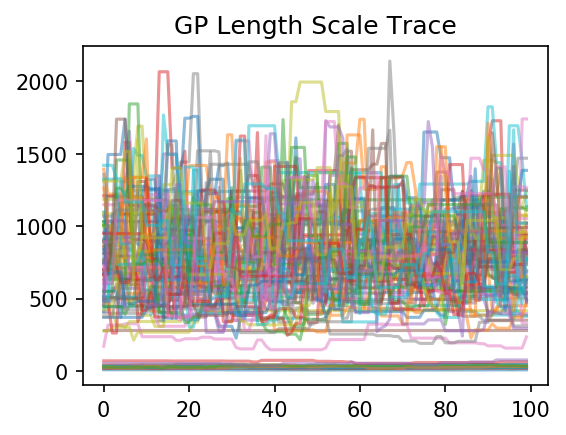

In [32]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(100, 200):
    plt.plot(trace_sample[i][0]['l'], alpha=0.5)
plt.title('GP Length Scale Trace')
plt.show()

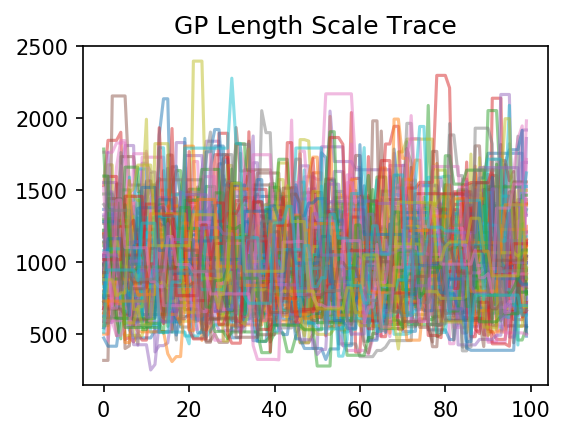

In [33]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(100, 200):
    plt.plot(trace_sample[i][1]['l'], alpha=0.5)
plt.title('GP Length Scale Trace')
plt.show()